In [28]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))

from models.KMeans import KMeans
from models.GMM import GMM
from models.DBSCAN import DBSCAN
from models.utils import normalize, kmeans_elbow_analysis, plot_kmeans_clusters, gmm_log_likelihood_curve, plot_gmm_clusters, grid_search_dbscan, plot_dbscan_clusters

RANDOM_SEED = 42

In [3]:
data = pd.read_csv("../data/clustering.csv").values[:, 1:]
data_std, mean, std = normalize(data)

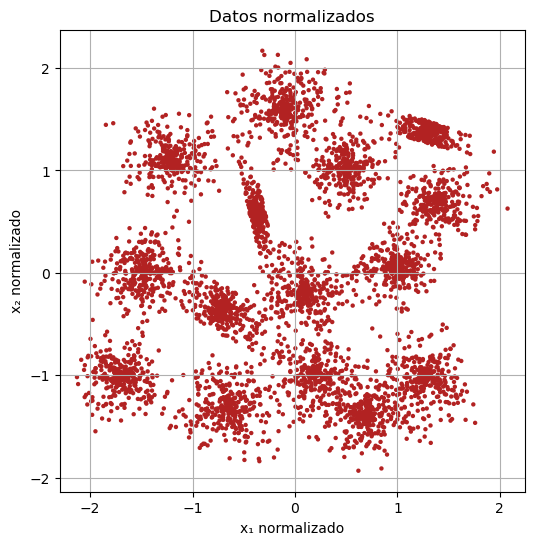

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(data_std[:, 0], data_std[:, 1], s=10, color="firebrick", edgecolor="none")
plt.xlabel("x₁ normalizado")
plt.ylabel("x₂ normalizado")
plt.title("Datos normalizados")
plt.grid(True)
plt.axis("equal")
plt.show()

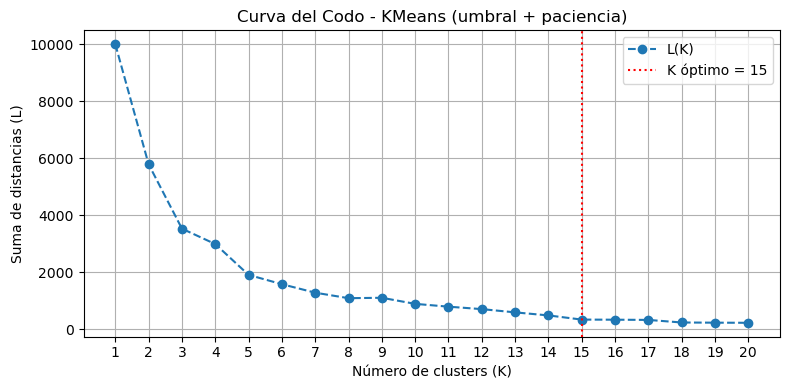

In [19]:
k_opt_KMeans = kmeans_elbow_analysis(data_std, K_range=range(1, 21), random_state=RANDOM_SEED, improvement_threshold=0.03, patience=2)

In [50]:
kmeans = KMeans(n_clusters=k_opt_KMeans, random_state=RANDOM_SEED)
kmeans.fit(data_std)

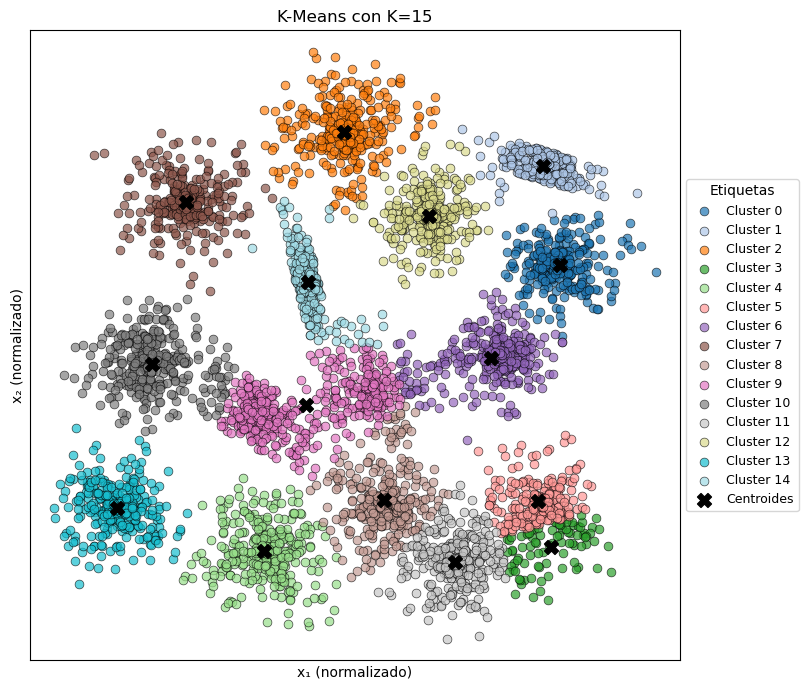

In [55]:
plot_kmeans_clusters(data_std, kmeans.labels_, kmeans.centroids, title=f"K-Means con K={k_opt_KMeans}")

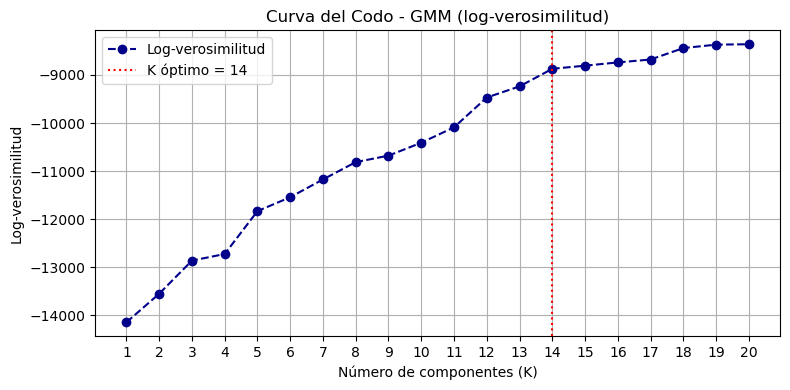

In [23]:
K_range = range(1, 21)
k_opt_GMM = gmm_log_likelihood_curve(data_std, K_range, random_state=RANDOM_SEED)

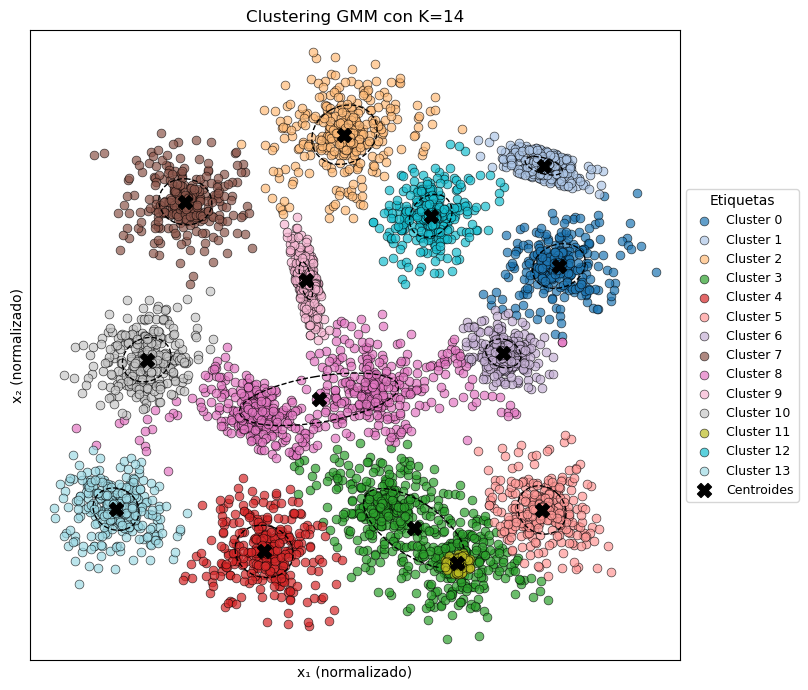

In [49]:
kmeans_for_gmm = KMeans(n_clusters=k_opt_GMM, random_state=RANDOM_SEED)
kmeans_for_gmm.fit(data_std)

gmm = GMM(n_components=k_opt_GMM, random_state=RANDOM_SEED, means_init=kmeans_for_gmm.centroids)
gmm.fit(data_std)
labels = gmm.predict(data_std)

plot_gmm_clusters(data_std, labels, gmm.means_, gmm.covariances_, title=f"Clustering GMM con K={k_opt_GMM}")


DBSCAN ε=0.2, min_samples=25: 100%|██████████| 24/24 [05:33<00:00, 13.88s/it] 


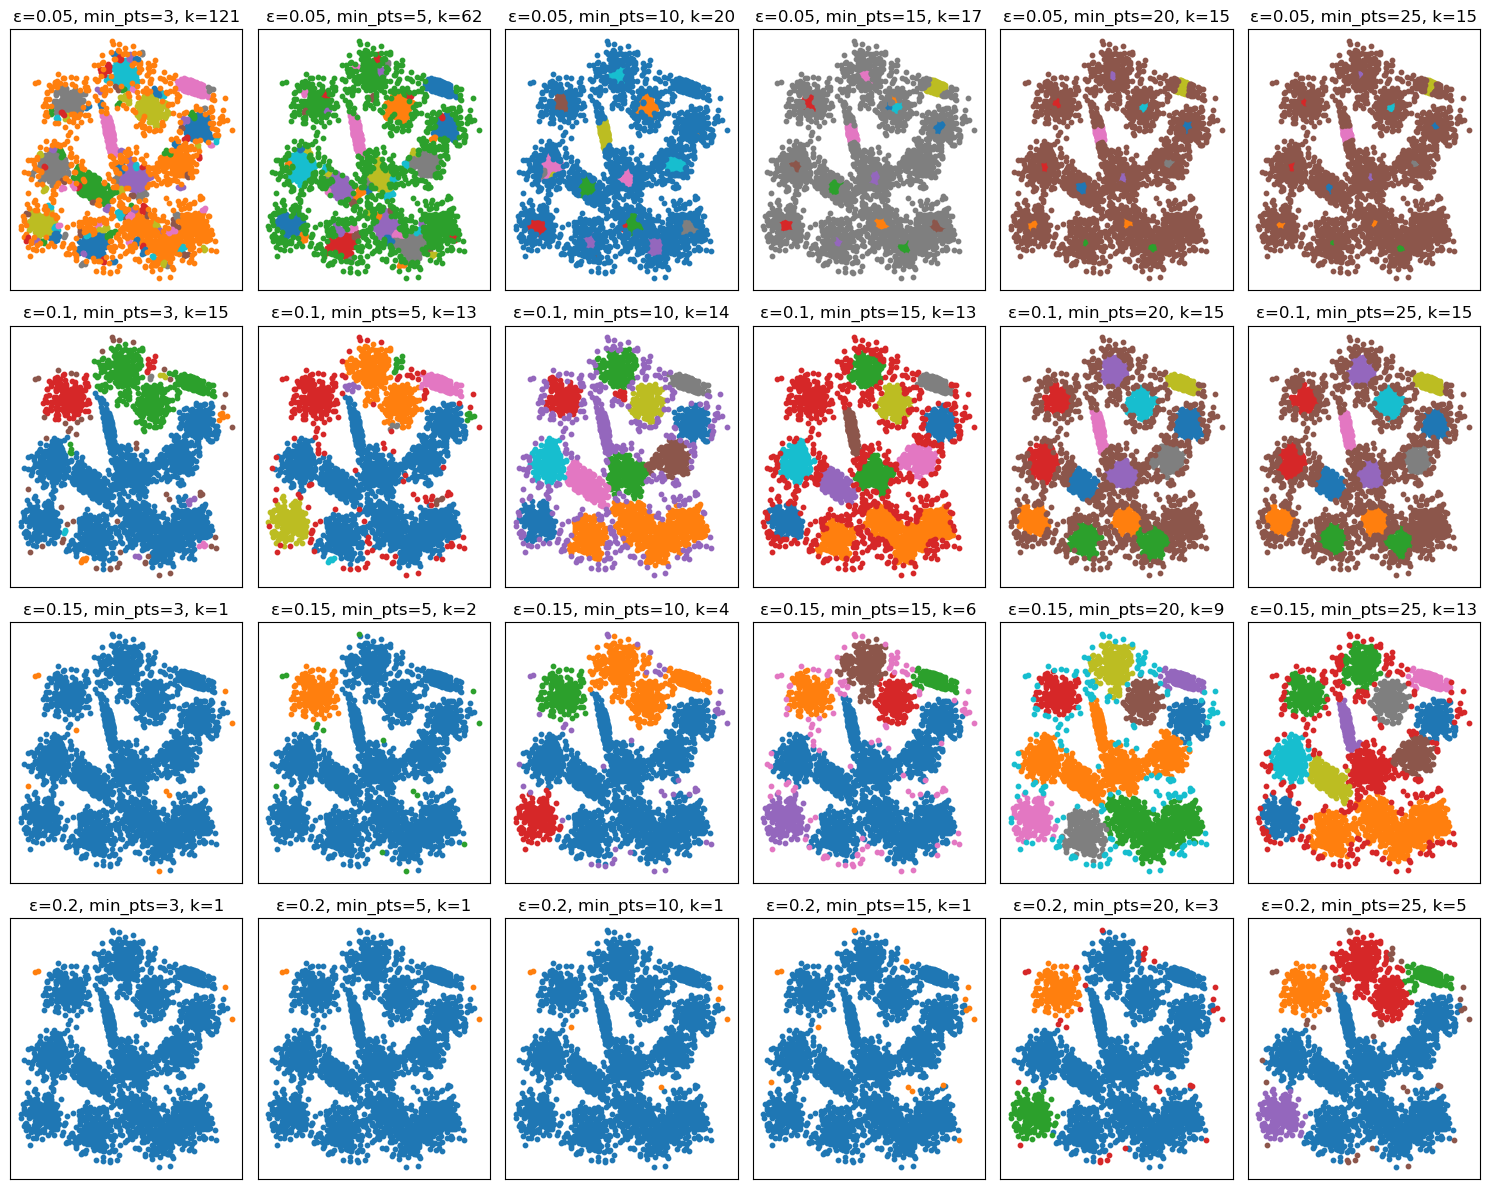

In [59]:
# Definimos valores a probar
eps_list = [0.05, 0.1, 0.15, 0.2]
min_samples_list = [3, 5, 10, 15, 20, 25]

# Ejecutamos el grid search y graficamos resultados
results = grid_search_dbscan(data_std, eps_list, min_samples_list)

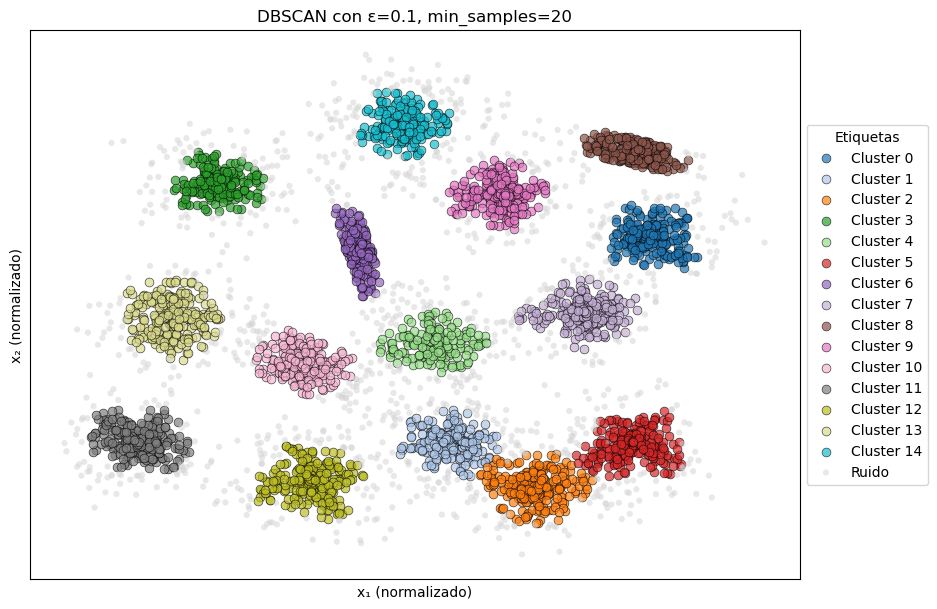

In [63]:
# Ejecutar DBSCAN con valores elegidos
min_samples = 20
eps = 0.1

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data_std)

# Graficar resultado
plot_dbscan_clusters(data_std, dbscan.labels_, title=f"DBSCAN con ε={eps}, min_samples={min_samples}")
